<a href="https://colab.research.google.com/github/khamoh/DeepLearning/blob/master/Copy_of_Case_Study_Sentiment_Analysis_Amazon_Mobile_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Sentiment Analysis

### Data Prep

In [0]:
# THis dataset also requires cleaning text and removing unwanted tokens using regular expressions,
# this part is not covered in this notebook to save time but strongly recommeded to perform.

In [0]:
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv(r"https://media.githubusercontent.com/media/anshupandey/Machine_Learning_Training/master/datasets/Amazon_Unlocked_Mobile.csv")
print(df.shape)
# Sample the data to speed up computation
# Comment out this line to match with lecture
df = df.sample(frac=0.1, random_state=10)
print(df.shape)
df.head()

(413840, 6)
(41384, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394349,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,Very good one! Better than Samsung S and iphon...,0.0
34377,Apple iPhone 5c 8GB (Pink) - Verizon Wireless,Apple,194.99,1,"The phone needed a SIM card, would have been n...",1.0
248521,Motorola Droid RAZR MAXX XT912 M Verizon Smart...,Motorola,174.99,5,I was 3 months away from my upgrade and my Str...,3.0
167661,CNPGD [U.S. Office Extended Warranty] Smartwat...,CNPGD,49.99,1,an experience i want to forget,0.0
73287,Apple iPhone 7 Unlocked Phone 256 GB - US Vers...,Apple,922.00,5,GREAT PHONE WORK ACCORDING MY EXPECTATIONS.,1.0


In [0]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)
print(df.shape)

(30737, 7)


In [0]:
# Most ratings are positive
df['Positively Rated'].mean()

0.7471776686078667

In [0]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

In [0]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 Everything about it is awesome!


X_train shape:  (23052,)


In [0]:
X_train

78589                       Everything about it is awesome!
2581      I bought this phone in July of 2015, and I lov...
303780    Small and very light, simple, when just a phon...
369144                                        Awesome phone
390639    The phone is just as described. Looks sleek an...
                                ...                        
33617     I am having the hardest time getting a SIM car...
253151                                            NUEVECITO
67505     I am a very satisfied customer and would highl...
397776    First of all there are few choices in sub 5" A...
191724    Within 2weeks of owning the phone it shown a u...
Name: Reviews, Length: 23052, dtype: object

# CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [0]:
vect.get_feature_names()[::2000]

['00',
 'arroja',
 'comapañias',
 'dvds',
 'golden',
 'lands',
 'oil',
 'razonable',
 'smallsliver',
 'tweak']

In [0]:
len(vect.get_feature_names())

19601

In [0]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<23052x19601 sparse matrix of type '<class 'numpy.int64'>'
	with 613289 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter= 500) # max iteration is 500 
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

In [0]:
model.score(vect.transform(X_test),y_test)

0.93181522446324

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1933
           1       0.94      0.97      0.95      5752

    accuracy                           0.93      7685
   macro avg       0.92      0.90      0.91      7685
weighted avg       0.93      0.93      0.93      7685

[[1601  332]
 [ 192 5560]]


In [0]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'terrible' 'slow' 'junk' 'poor' 'sucks' 'horrible' 'useless'
 'waste' 'disappointed']

Largest Coefs: 
['excelent' 'excelente' 'excellent' 'perfectly' 'love' 'perfect' 'exactly'
 'great' 'best' 'awesome']


# Tfidf

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

5442

In [0]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1933
           1       0.94      0.97      0.95      5752

    accuracy                           0.93      7685
   macro avg       0.92      0.89      0.90      7685
weighted avg       0.93      0.93      0.93      7685

[[1563  370]
 [ 165 5587]]


In [0]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['61' 'printer' 'approach' 'adjustment' 'consequences' 'length' 'emailing'
 'degrees' 'handsfree' 'chipset']

Largest tfidf: 
['unlocked' 'handy' 'useless' 'cheat' 'up' 'original' 'exelent' 'exelente'
 'exellent' 'satisfied']


In [0]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['not' 'slow' 'disappointed' 'worst' 'terrible' 'never' 'return' 'doesn'
 'horrible' 'waste']

Largest Coefs: 
['great' 'love' 'excellent' 'good' 'best' 'perfect' 'price' 'awesome'
 'far' 'perfectly']


In [0]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams

In [0]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

29072

In [0]:
model = LogisticRegression(max_iter= 500)
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1933
           1       0.95      0.97      0.96      5752

    accuracy                           0.94      7685
   macro avg       0.93      0.91      0.92      7685
weighted avg       0.94      0.94      0.94      7685

[[1649  284]
 [ 178 5574]]


In [0]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'junk' 'poor' 'slow' 'worst' 'broken' 'not good' 'terrible'
 'defective' 'horrible']

Largest Coefs: 
['excellent' 'excelente' 'excelent' 'perfect' 'great' 'love' 'awesome'
 'no problems' 'good' 'best']


In [0]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


# LSTM

In [0]:
!pip install tensorflow
!pip install keras

In [0]:
from keras import models,layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
x= df['Reviews']
y = df['Positively Rated']
print(x.shape)
print(y.shape)

(30737,)
(30737,)


In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 120  # example - word apple will be converted into 120 numbers 

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True)

tokenizer.fit_on_texts(x.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23534 unique tokens.


In [0]:
#making every reviview of size 250 tokens
x = tokenizer.texts_to_sequences(x.values)
x = pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)  
# pad every document to onvert into size of 250 words,,,, if document > 250 it will be clipped out. Lower than 250 , filled with zeroes 
print('Shape of data tensor:', x.shape)

Shape of data tensor: (30737, 250)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(27663, 250) (27663,)
(3074, 250) (3074,)


In [0]:
model = models.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x.shape[1]))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=100,validation_data=(X_test,Y_test),
                    verbose=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 27663 samples, validate on 3074 samples
Epoch 1/10
27663/27663 [==============================] - 200s 7ms/step - loss: 0.3127 - accuracy: 0.8651 - val_loss: 0.1992 - val_accuracy: 0.9245
Epoch 2/10
27663/27663 [==============================] - 199s 7ms/step - loss: 0.1710 - accuracy: 0.9368 - val_loss: 0.2299 - val_accuracy: 0.9109
Epoch 3/10
27663/27663 [==============================] - 200s 7ms/step - loss: 0.1370 - accuracy: 0.9507 - val_loss: 0.1831 - val_accuracy: 0.9385
Epoch 4/10
27663/27663 [==============================] - 199s 7ms/step - loss: 0.1089 - accuracy: 0.9623 - val_loss: 0.2060 - val_accuracy: 0.9320
Epoch 5/10
27663/27663 [==============================] - 199s 7ms/step - loss: 0.0954 - accuracy: 0.9677 - val_loss: 0.1862 - val_accuracy: 0.9414
Epoch 6/10
27663/27663 [==============================] - 199s 7ms/step - loss: 0.0771 - accuracy: 0.9743 - val_loss: 0.1948 - val_accuracy: 0.9414
Epoch 7/10
27663/27663 [==============================] - 199s 

In [0]:
loss,accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accr))

3074/3074 [==============================] - 6s 2ms/step
Test set
  Loss: 0.232
  Accuracy: 0.936


In [0]:
predictions = model.predict_classes(X_test)
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       755
           1       0.95      0.97      0.96      2319

    accuracy                           0.94      3074
   macro avg       0.92      0.90      0.91      3074
weighted avg       0.94      0.94      0.94      3074

[[ 635  120]
 [  77 2242]]


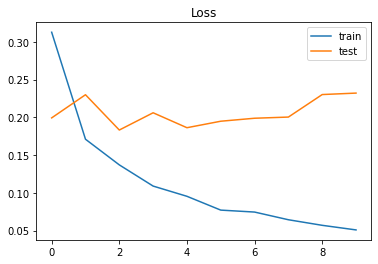

In [0]:
import matplotlib.pyplot as plt


plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

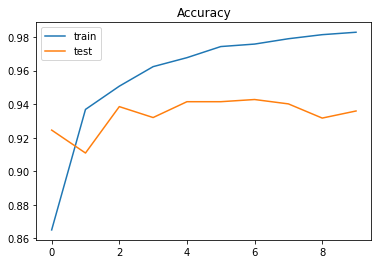

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()